C:\Users\asad\Anaconda2\envs\python38\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\asad\Anaconda2\envs\python38\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\asad\Anaconda2\envs\python38\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


<class 'numpy.ndarray'> <class 'int'>
(661794,) 22050


TypeError: __init__() got an unexpected keyword argument 'basey'

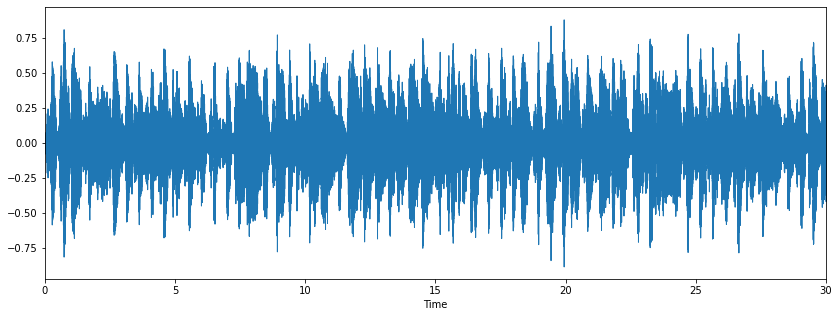

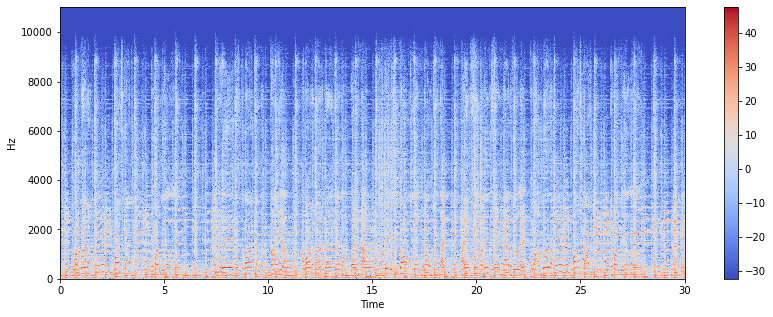

In [3]:
#pip install librosa
#How to handle audio data
import librosa
audio_data = 'E:\\archive\\Data\\genres\\blues\\blues.00000.wav'
x , sr = librosa.load(audio_data)
print(type(x), type(sr))
print(x.shape, sr)

#Visualize an audio file
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

#Spectogram
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

#audio widget
import IPython.display as ipd
ipd.Audio(audio_data)

#creating an Audio signal
import numpy as np
sr = 22050 # sample rate
T = 5.0    # seconds
t = np.linspace(0, T, int(T*sr), endpoint=False) # time variable
x = 0.5*np.sin(2*np.pi*220*t)# pure sine wave at 220 Hz Playing the audio
ipd.Audio(x, rate=sr) # load a NumPy array
#Saving the audio
librosa.output.write_wav('blues.00000.wav', x, sr)

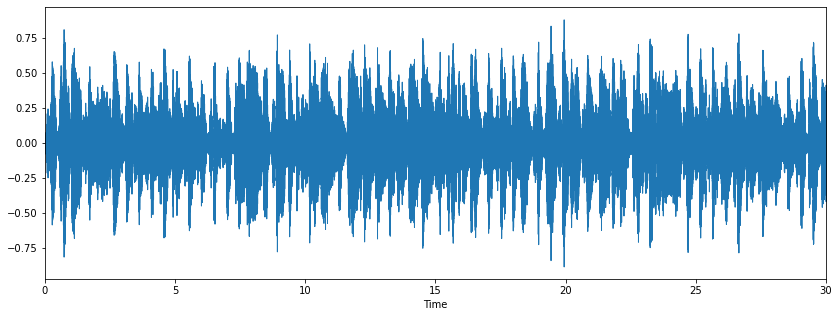

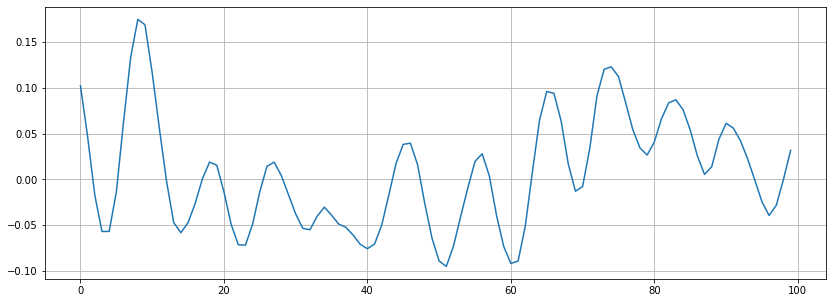

In [4]:
#Feature extraction
# 1.Zero Crossing Rate : The zero crossing rate is the rate of sign-changes along a signal, i.e., the rate at which the signal changes from positive to negative or back.
# Load the signal
x, sr = librosa.load('E:\\archive\\Data\\genres\\blues\\blues.00000.wav')
#Plot the signal:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)
# Zooming in
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()

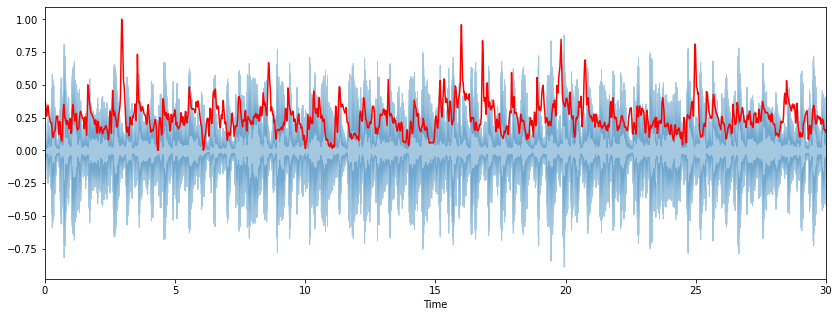

In [5]:
#2. Spectral Centroid: It indicates where the ”centre of mass” for a sound is located and is calculated as the weighted mean of the frequencies present in the sound.
import sklearn
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape
(775,)
# Computing the time variable for visualization
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

# Normalising the spectral centroid for visualisation
plt.figure(figsize=(14, 5))
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')


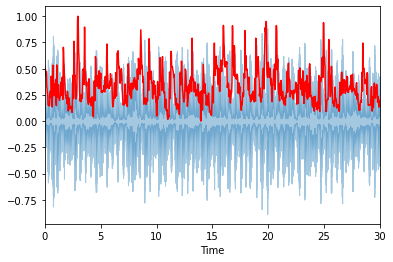

In [6]:
#3. Spectral Rolloff
#It is a measure of the shape of the signal. It represents the frequency below which a specified percentage of the total spectral energy.
spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=sr)[0]
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

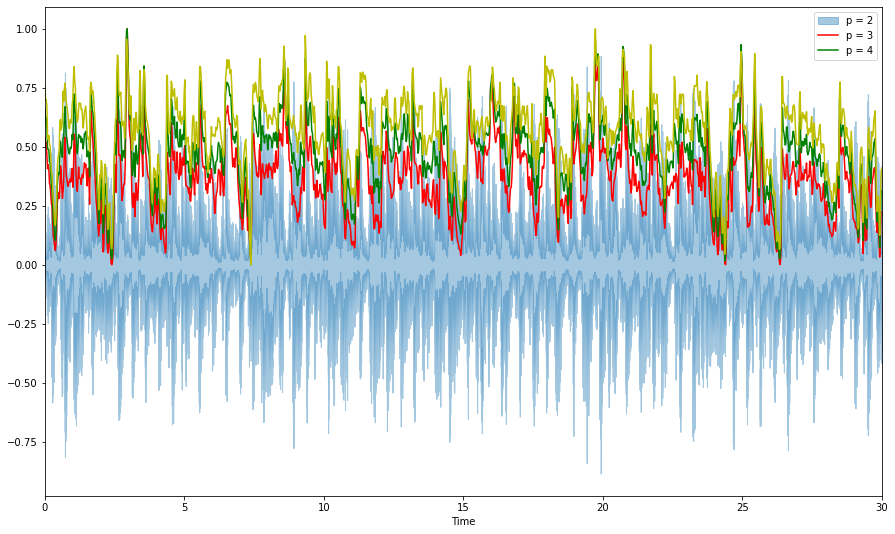

In [7]:
#4. Spectral Bandwidth
spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=4)[0]
plt.figure(figsize=(15, 9))
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_bandwidth_2), color='r')
plt.plot(t, normalize(spectral_bandwidth_3), color='g')
plt.plot(t, normalize(spectral_bandwidth_4), color='y')
plt.legend(('p = 2', 'p = 3', 'p = 4'))

(20, 1293)


(20, 97)

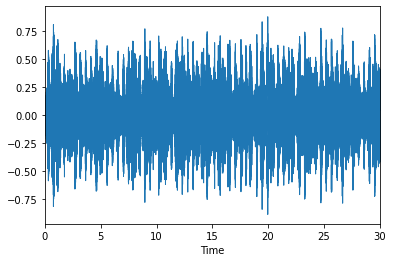

In [10]:
#4. Mel-Frequency Cepstral Coefficients : The Mel frequency cepstral coefficients (MFCCs) of a signal are a small set of features (usually about 10–20) which concisely describe the overall shape of a spectral envelope.
x, fs = librosa.load('E:\\archive\\Data\\genres\\blues\\blues.00000.wav')
librosa.display.waveplot(x, sr=sr)
mfccs = librosa.feature.mfcc(x, sr=fs)
print (mfccs.shape)
(20, 97)

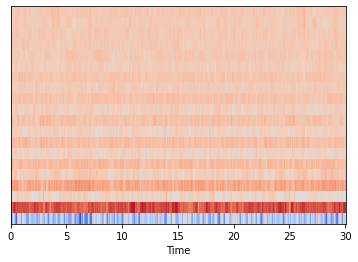

In [11]:
#Displaying  the MFCCs:
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

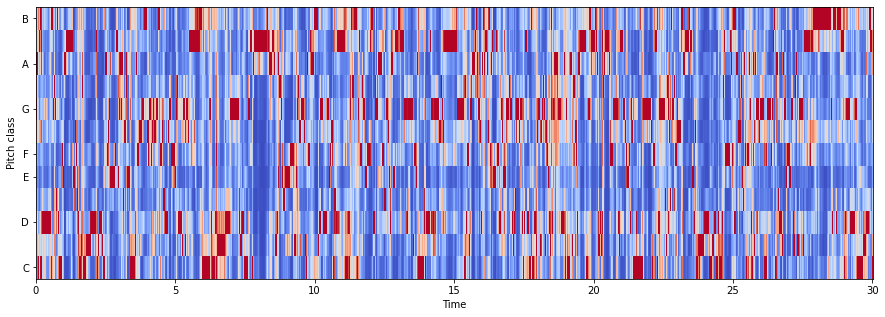

In [12]:



#5. Chroma Frequencies : Chroma features are an interesting and powerful representation for music audio in which the entire spectrum is projected onto 12 bins representing the 12 distinct semitones (or chroma) of the musical octave.
# Loadign the file
x, sr = librosa.load('E:\\archive\\Data\\genres\\blues\\blues.00000.wav')
hop_length = 512
chromagram = librosa.feature.chroma_stft(x, sr=sr, hop_length=hop_length)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')


In [ ]:
"""
In This section, we will model a classifier to classify songs into different genres. Let us assume a scenario in which, for some reason, we find a bunch of randomly named MP3 files on our hard disk, which are assumed to contain music. Our task is to sort them according to the music genre into different folders such as jazz, classical, country, pop, rock, and metal.
Dataset
"""
import pandas as pd
import numpy as np
from numpy import argmax
import matplotlib.pyplot as plt
%matplotlib inline
import librosa
import librosa.display
import IPython.display
import pandas as pd
import random
import warnings
import os
from PIL import Image
import pathlib
import csv
# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
#Keras
import keras
import warnings
warnings.filterwarnings('ignore')
from keras import layers
from keras.layers import Activation, Dense, Dropout, Conv1D, Conv2D, Flatten, BatchNormalization, ZeroPadding2D, MaxPooling2D, GlobalMaxPooling2D, GlobalAveragePooling1D, AveragePooling2D, Input, Add
from keras.models import Sequential
from keras import regularizers
from keras.optimizers import SGD
import keras.backend as K
from keras.models import load_model
from keras.callbacks import EarlyStopping



In [16]:

"""
Extracting music and features
Dataset
We use DALI genre collection dataset for classification.
The dataset consists of 10 genres i.e
Blues Classical Country Disco Hiphop Jazz Metal Pop Reggae Rock
Each genre contains 100 songs. Total dataset: 1000 songs
"""
""" Extracting the Spectrogram for every Audio """

cmap = plt.get_cmap('inferno')
plt.figure(figsize=(8,8))
genres = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()
for g in genres:
    pathlib.Path(f'img_data/{g}').mkdir(parents=True, exist_ok=True)
    for filename in os.listdir(f'E:\\archive\\Data\\genres\\{g}'):
        songname = f'E:\\archive\\Data\\genres\\{g}/{filename}'
        y, sr = librosa.load(songname, mono=True, duration=5)
        print(y.shape)
        plt.specgram(y, NFFT=2048, Fs=2, Fc=0, noverlap=128, cmap=cmap, sides='default', mode='default', scale='dB');
        plt.axis('off');
        plt.savefig(f'img_data/{g}/{filename[:-3].replace(".", "")}.png')
        plt.clf()

"""
All the audio files get converted into their respective spectrograms .WE can noe easily extract features from them.
"""
"""
Extracting features from Spectrogram and they are:

Mel-frequency cepstral coefficients (MFCC)(20 in number)
Spectral Centroid,
Zero Crossing Rate
Chroma Frequencies
Spectral Roll-off.
"""

header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 21):
    header += f' mfcc{i}'
header += ' label'
header = header.split()

#We write the data to a csv file

file = open('dataset.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)
genres = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()
for g in genres:
    for filename in os.listdir(f'E:\\archive\\Data\\genres\\{g}'):
        songname = f'E:\\archive\\Data\\genres\\{g}/{filename}'
        y, sr = librosa.load(songname, mono=True, duration=30)
        rmse = librosa.feature.rms(y=y)
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
        for e in mfcc:
            to_append += f' {np.mean(e)}'
        to_append += f' {g}'
        file = open('dataset.csv', 'a', newline='')
        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())

(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)


(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)


<Figure size 576x576 with 0 Axes>

In [17]:
#Analysing the Data in Pandas
data = pd.read_csv('dataset.csv')
data.head()
# Dropping unneccesary columns
data = data.drop(['filename'],axis=1)
#Encoding the Labels
genre_list = data.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(genre_list)
#Scaling the Feature columns
scaler = StandardScaler()
X = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))
#Dividing data into training and Testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [18]:
#ANN implementation
from keras import layers
from keras import layers
import keras
from keras.models import Sequential
model = Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

classifier = model.fit(X_train,
                    y_train,
                    epochs=100,
                    batch_size=128)

test_loss, test_acc = model.evaluate(X_test,y_test)
print('test_acc: ',test_acc)

Epoch 1/100
7/7 [==============================] - 2s 3ms/step - loss: 2.2018 - accuracy: 0.2196
Epoch 2/100
7/7 [==============================] - 0s 3ms/step - loss: 1.8541 - accuracy: 0.3794
Epoch 3/100
7/7 [==============================] - 0s 3ms/step - loss: 1.6234 - accuracy: 0.4409
Epoch 4/100
7/7 [==============================] - 0s 3ms/step - loss: 1.4335 - accuracy: 0.5232
Epoch 5/100
7/7 [==============================] - 0s 3ms/step - loss: 1.3168 - accuracy: 0.5513
Epoch 6/100
7/7 [==============================] - 0s 3ms/step - loss: 1.1916 - accuracy: 0.6052
Epoch 7/100
7/7 [==============================] - 0s 4ms/step - loss: 1.1134 - accuracy: 0.6517
Epoch 8/100
7/7 [==============================] - 0s 3ms/step - loss: 0.9851 - accuracy: 0.6958
Epoch 9/100
7/7 [==============================] - 0s 3ms/step - loss: 0.9780 - accuracy: 0.6898
Epoch 10/100
7/7 [==============================] - 0s 3ms/step - loss: 0.8852 - accuracy: 0.7148
Epoch 11/100
7/7 [===========

In [19]:




#Validating our approach¶
x_val = X_train[:200]
partial_x_train = X_train[200:]

y_val = y_train[:200]
partial_y_train = y_train[200:]

model = Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs=30,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(X_test, y_test)







Epoch 1/30
2/2 [==============================] - 2s 981ms/step - loss: 2.3111 - accuracy: 0.0896 - val_loss: 2.1847 - val_accuracy: 0.1750
Epoch 2/30
2/2 [==============================] - 0s 38ms/step - loss: 2.1391 - accuracy: 0.2420 - val_loss: 2.0672 - val_accuracy: 0.2800
Epoch 3/30
2/2 [==============================] - 0s 37ms/step - loss: 2.0021 - accuracy: 0.3234 - val_loss: 1.9387 - val_accuracy: 0.3500
Epoch 4/30
2/2 [==============================] - 0s 36ms/step - loss: 1.8655 - accuracy: 0.4114 - val_loss: 1.8029 - val_accuracy: 0.3600
Epoch 5/30
2/2 [==============================] - 0s 33ms/step - loss: 1.7256 - accuracy: 0.4300 - val_loss: 1.6783 - val_accuracy: 0.3950
Epoch 6/30
2/2 [==============================] - 0s 39ms/step - loss: 1.6114 - accuracy: 0.4138 - val_loss: 1.5845 - val_accuracy: 0.4350
Epoch 7/30
2/2 [==============================] - 0s 35ms/step - loss: 1.5101 - accuracy: 0.4484 - val_loss: 1.5099 - val_accuracy: 0.4550
Epoch 8/30
2/2 [==========

In [79]:
predictions

array([8, 2, 2, 5, 4, 6, 6, 5, 3, 4, 0, 9, 9, 0, 2, 7, 6, 1, 6, 8, 4, 7,
       4, 2, 5, 7, 2, 9, 5, 1, 0, 4, 8, 1, 8, 2, 4, 5, 8, 8, 0, 6, 1, 2,
       8, 2, 3, 0, 5, 1, 7, 7, 4, 2, 2, 7, 0, 6, 0, 4, 6, 4, 4, 2, 8, 6,
       6, 2, 3, 5, 6, 2, 6, 3, 7, 8, 9, 7, 3, 2, 9, 8, 8, 6, 3, 6, 8, 1,
       8, 5, 0, 2, 7, 4, 5, 1, 6, 2, 7, 7, 9, 2, 4, 6, 8, 5, 1, 8, 5, 6,
       6, 1, 9, 3, 5, 9, 3, 6, 6, 9, 5, 2, 1, 8, 3, 6, 0, 6, 2, 2, 5, 6,
       5, 5, 4, 2, 0, 5, 4, 6, 7, 9, 4, 7, 5, 1, 7, 2, 6, 1, 1, 1, 2, 6,
       8, 2, 4, 2, 5, 1, 7, 1, 4, 6, 1, 5, 6, 6, 7, 0, 4, 8, 3, 2, 4, 4,
       3, 7, 9, 8, 9, 1, 5, 9, 8, 8, 7, 8, 6, 9, 4, 6, 2, 1, 9, 9, 5, 2,
       8, 4], dtype=int64)

In [120]:


#Validating our approach¶
x_val = X_train[:100]
partial_x_train = X_train[100:]

y_val = y_train[:100]
partial_y_train = np.array(y_train[100:])

model = Sequential()
model.add(layers.Dense(712, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(456, activation='relu'))
model.add(layers.Dense(328, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(60, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



In [121]:
model.fit(partial_x_train,
          partial_y_train,
          epochs=30,
          batch_size=712,
          validation_data=(x_val, y_val))

Epoch 1/30
1/1 [==============================] - 2s 2s/step - loss: 4.1225 - accuracy: 0.0043 - val_loss: 3.9224 - val_accuracy: 0.1000
Epoch 2/30
1/1 [==============================] - 0s 76ms/step - loss: 3.8693 - accuracy: 0.1757 - val_loss: 3.7261 - val_accuracy: 0.1300
Epoch 3/30
1/1 [==============================] - 0s 67ms/step - loss: 3.6327 - accuracy: 0.2100 - val_loss: 3.4628 - val_accuracy: 0.1900
Epoch 4/30
1/1 [==============================] - 0s 72ms/step - loss: 3.3306 - accuracy: 0.2557 - val_loss: 3.1376 - val_accuracy: 0.2500
Epoch 5/30
1/1 [==============================] - 0s 67ms/step - loss: 2.9666 - accuracy: 0.3186 - val_loss: 2.7952 - val_accuracy: 0.2800
Epoch 6/30
1/1 [==============================] - 0s 103ms/step - loss: 2.5940 - accuracy: 0.3443 - val_loss: 2.5073 - val_accuracy: 0.3000
Epoch 7/30
1/1 [==============================] - 0s 91ms/step - loss: 2.2891 - accuracy: 0.3486 - val_loss: 2.2709 - val_accuracy: 0.3200
Epoch 8/30
1/1 [============

In [122]:
y_test_np = np.array(y_test)
results = model.evaluate(X_test, y_test_np)

7/7 [==============================] - 0s 3ms/step - loss: 1.0392 - accuracy: 0.6150


#### in this experiment I reduce the trainnig data set from 200  to 100 
#### and got the results with accuracy 61%  thus we need to increase the data set

In [134]:
#increasing the trainning data set to 400
x_val = X_train[:300]
partial_x_train = X_train[300:]

y_val = y_train[:300]
partial_y_train = np.array(y_train[300:])

model = Sequential()
model.add(layers.Dense(712, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(456, activation='relu'))
model.add(layers.Dense(328, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(60, activation='softmax'))
## Changing the Optimizer From ADAM    to SGD
model.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [135]:
model.fit(partial_x_train,
          partial_y_train,
          epochs=30,
          batch_size=712,
          validation_data=(x_val, y_val))

Epoch 1/30
1/1 [==============================] - 2s 2s/step - loss: 4.1111 - accuracy: 0.0000e+00 - val_loss: 4.0933 - val_accuracy: 0.0000e+00
Epoch 2/30
1/1 [==============================] - 0s 69ms/step - loss: 4.1052 - accuracy: 0.0000e+00 - val_loss: 4.0880 - val_accuracy: 0.0033
Epoch 3/30
1/1 [==============================] - 0s 63ms/step - loss: 4.0994 - accuracy: 0.0020 - val_loss: 4.0828 - val_accuracy: 0.0033
Epoch 4/30
1/1 [==============================] - 0s 62ms/step - loss: 4.0937 - accuracy: 0.0020 - val_loss: 4.0775 - val_accuracy: 0.0067
Epoch 5/30
1/1 [==============================] - 0s 61ms/step - loss: 4.0879 - accuracy: 0.0060 - val_loss: 4.0723 - val_accuracy: 0.0100
Epoch 6/30
1/1 [==============================] - 0s 61ms/step - loss: 4.0822 - accuracy: 0.0060 - val_loss: 4.0670 - val_accuracy: 0.0133
Epoch 7/30
1/1 [==============================] - 0s 67ms/step - loss: 4.0764 - accuracy: 0.0100 - val_loss: 4.0617 - val_accuracy: 0.0133
Epoch 8/30
1/1 [=

In [137]:
y_test_np = np.array(y_test)
results = model.evaluate(X_test, y_test_np)

7/7 [==============================] - 0s 3ms/step - loss: 3.9329 - accuracy: 0.1600


#### So the SGD optimizer give the worst results that is on 16% accuracy 


In [138]:
#reverting back the trainning data set to 200
x_val = X_train[:200]
partial_x_train = X_train[200:]

y_val = y_train[:200]
partial_y_train = np.array(y_train[200:])

model = Sequential()
model.add(layers.Dense(712, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(456, activation='relu'))
model.add(layers.Dense(328, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(60, activation='softmax'))
## Changing the Optimizer From SGD to RMSprop
model.compile(optimizer='RMSprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [139]:
model.fit(partial_x_train,
          partial_y_train,
          epochs=30,
          batch_size=712,
          validation_data=(x_val, y_val))

Epoch 1/30
1/1 [==============================] - 2s 2s/step - loss: 4.0841 - accuracy: 0.0033 - val_loss: 3.3896 - val_accuracy: 0.2900
Epoch 2/30
1/1 [==============================] - 0s 71ms/step - loss: 3.3343 - accuracy: 0.2817 - val_loss: 2.4881 - val_accuracy: 0.3150
Epoch 3/30
1/1 [==============================] - 0s 68ms/step - loss: 2.3489 - accuracy: 0.3433 - val_loss: 2.3110 - val_accuracy: 0.2700
Epoch 4/30
1/1 [==============================] - 0s 69ms/step - loss: 2.2534 - accuracy: 0.3017 - val_loss: 2.3503 - val_accuracy: 0.2850
Epoch 5/30
1/1 [==============================] - 0s 71ms/step - loss: 2.2738 - accuracy: 0.2917 - val_loss: 2.3705 - val_accuracy: 0.2300
Epoch 6/30
1/1 [==============================] - 0s 83ms/step - loss: 2.2196 - accuracy: 0.2967 - val_loss: 1.7601 - val_accuracy: 0.4150
Epoch 7/30
1/1 [==============================] - 0s 67ms/step - loss: 1.7665 - accuracy: 0.4233 - val_loss: 1.6312 - val_accuracy: 0.4450
Epoch 8/30
1/1 [=============

In [140]:
y_test_np = np.array(y_test)
results = model.evaluate(X_test, y_test_np)

7/7 [==============================] - 0s 3ms/step - loss: 1.2175 - accuracy: 0.5650


#### the RMSProp  also produce not any good accuracy i.e 56% which is also not recommended

In [226]:
#reverting back the trainning data set to 200
x_val = X_train[:200]
partial_x_train = X_train[200:]

y_val = y_train[:200]
partial_y_train = np.array(y_train[200:])

model2 = Sequential()
model2.add(layers.Dense(712, activation='relu', input_shape=(X_train.shape[1],)))
model2.add(layers.Dense(456, activation='relu'))
model2.add(layers.Dense(228, activation='relu'))
model2.add(layers.Dense(50, activation='relu'))
model2.add(layers.Dense(20, activation='softmax'))
## Changing the Optimizer From RMSprop  to Adam
model2.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [227]:
model2.fit(partial_x_train,
          partial_y_train,
          epochs=100,
          batch_size=500,
          validation_data=(x_val, y_val))

Epoch 1/100
2/2 [==============================] - 2s 501ms/step - loss: 2.9503 - accuracy: 0.1129 - val_loss: 2.6830 - val_accuracy: 0.3250
Epoch 2/100
2/2 [==============================] - 0s 40ms/step - loss: 2.6203 - accuracy: 0.3384 - val_loss: 2.3627 - val_accuracy: 0.3450
Epoch 3/100
2/2 [==============================] - 0s 38ms/step - loss: 2.2757 - accuracy: 0.3360 - val_loss: 2.1366 - val_accuracy: 0.3500
Epoch 4/100
2/2 [==============================] - 0s 43ms/step - loss: 2.0268 - accuracy: 0.3344 - val_loss: 1.9207 - val_accuracy: 0.3800
Epoch 5/100
2/2 [==============================] - 0s 48ms/step - loss: 1.7903 - accuracy: 0.3871 - val_loss: 1.7288 - val_accuracy: 0.4200
Epoch 6/100
2/2 [==============================] - 0s 38ms/step - loss: 1.6008 - accuracy: 0.4844 - val_loss: 1.5804 - val_accuracy: 0.4450
Epoch 7/100
2/2 [==============================] - 0s 39ms/step - loss: 1.4473 - accuracy: 0.5298 - val_loss: 1.5148 - val_accuracy: 0.4500
Epoch 8/100
2/2 [==

In [228]:

y_test_np - np.array(y_test)
results = model2.evaluate(X_test, y_test_np)

7/7 [==============================] - 0s 3ms/step - loss: 1.8936 - accuracy: 0.6500


In [242]:
results

[1.8935866355895996, 0.6499999761581421]

In [78]:
#Predictions on Test Data
#predictions = model.predict(X_test)
predictions = model.predict_generator(X_test, steps=8, verbose=1).argmax(axis=1)

X_test

8/8 [==============================] - 0s 3ms/step


array([[-0.09618507,  0.12926486, -0.78545113, ...,  0.8447934 ,
        -0.52948699, -0.00780725],
       [ 0.08912813,  0.54370863,  0.07279583, ...,  1.55889161,
        -0.58064852, -0.18522288],
       [-0.6480591 ,  1.32829524, -0.62353804, ...,  0.94426262,
         0.65140341, -0.1626055 ],
       ...,
       [ 0.40258174,  1.34836566,  0.8287569 , ...,  0.27844986,
         0.73075615,  1.05127876],
       [ 0.81128661, -1.119874  , -0.12251876, ...,  0.1987515 ,
         0.56214329,  0.4964567 ],
       [ 0.37302081,  0.7400945 ,  1.48122938, ..., -1.00526879,
        -0.02564713, -0.25838587]])

In [230]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report
from sklearn import metrics
from sklearn.metrics import f1_score

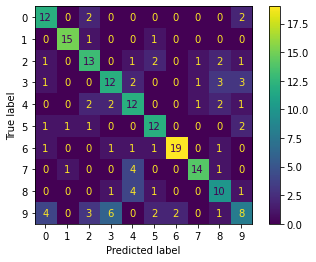

In [233]:
# Making the Confusion Matrix


cm = confusion_matrix(y_test_np, predictions)
#disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
ConfusionMatrixDisplay.from_predictions(y_test_np, predictions)
import seaborn as sn


In [234]:
target_names = ['class 0', 'class 1', 'class 2','class 3','class 4','class 5','class 6','class 7','class 8','class 9']
print(classification_report(y_test_np, predictions, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.60      0.75      0.67        16
     class 1       0.88      0.88      0.88        17
     class 2       0.59      0.62      0.60        21
     class 3       0.55      0.55      0.55        22
     class 4       0.50      0.60      0.55        20
     class 5       0.63      0.71      0.67        17
     class 6       0.90      0.79      0.84        24
     class 7       0.82      0.70      0.76        20
     class 8       0.50      0.59      0.54        17
     class 9       0.44      0.31      0.36        26

    accuracy                           0.64       200
   macro avg       0.64      0.65      0.64       200
weighted avg       0.64      0.64      0.63       200



In [235]:
f1_score(y_test_np, predictions, average='macro')


0.6416624633587696

In [241]:
metrics.r2_score(y_test_np, predictions)

-0.03977077082001079

#### It indicate that almost   25% of the variance of the dependent variable being studied is explained by the variance of the independent variable